# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [26]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}") 


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=83211cff9a433638d781c4b9442ee040"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        print(city_weather)
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ancud
{'coord': {'lon': -73.8203, 'lat': -41.8697}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 11.08, 'feels_like': 10.15, 'temp_min': 11.08, 'temp_max': 11.08, 'pressure': 1016, 'humidity': 73, 'sea_level': 1016, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 5.04, 'deg': 343, 'gust': 9.22}, 'clouds': {'all': 100}, 'dt': 1684276324, 'sys': {'country': 'CL', 'sunrise': 1684238342, 'sunset': 1684273468}, 'timezone': -14400, 'id': 3899695, 'name': 'Ancud', 'cod': 200}
Processing Record 2 of Set 1 | bethel
{'coord': {'lon': -73.414, 'lat': 41.3712}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 22.98, 'feels_like': 22.22, 'temp_min': 19.76, 'temp_max': 25.47, 'pressure': 998, 'humidity': 34}, 'visibility': 10000, 'wind': {'sp

In [28]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count   
city_data_df.count()


City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [29]:
# Display sample data
city_data_df.head() 


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,11.08,73,100,5.04,CL,1684276324
1,bethel,41.3712,-73.4140,25.47,34,0,3.60,US,1684276385
2,ushuaia,-54.8000,-68.3000,6.81,61,20,5.14,AR,1684276075
3,klyuchi,52.2667,79.1667,9.97,65,66,3.34,RU,1684276419
4,barentu,15.1139,37.5928,29.09,11,2,1.68,ER,1684276623


In [30]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [31]:
# Read saved data
city_data_df.to_csv("WeatherPy.csv",encoding="utf-8",index=False)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ancud,-41.8697,-73.8203,11.08,73,100,5.04,CL,1684276324
1,bethel,41.3712,-73.4140,25.47,34,0,3.60,US,1684276385
2,ushuaia,-54.8000,-68.3000,6.81,61,20,5.14,AR,1684276075
3,klyuchi,52.2667,79.1667,9.97,65,66,3.34,RU,1684276419
4,barentu,15.1139,37.5928,29.09,11,2,1.68,ER,1684276623


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

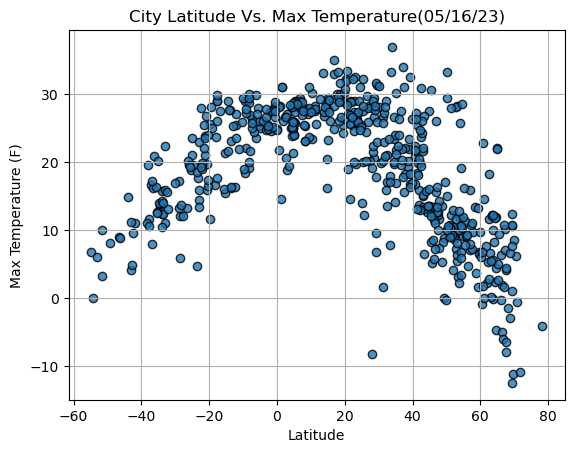

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], 
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("output_data/Fig1.png")
plt.savefig("Latitude vs Temperature (F).png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

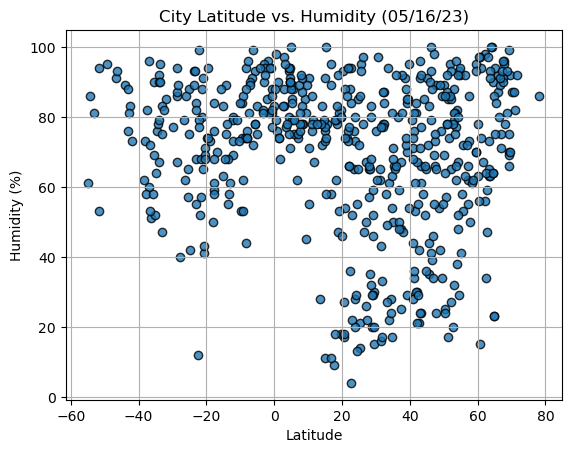

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], 
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

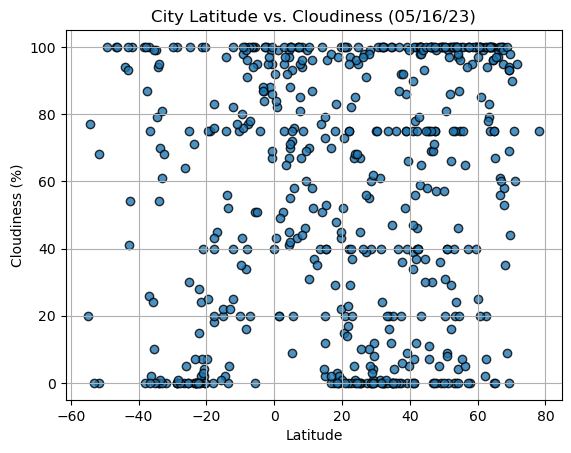

In [34]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], 
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

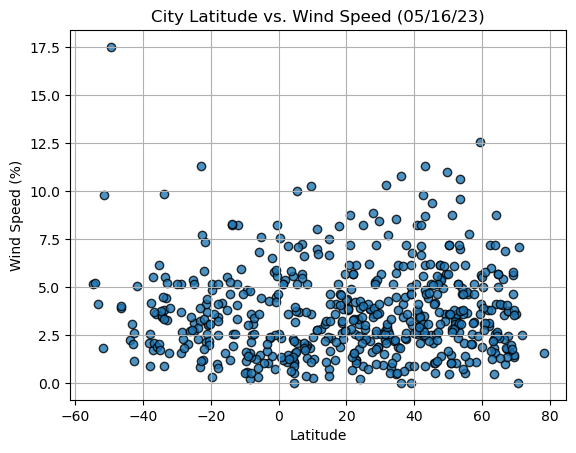

In [35]:
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots

def plotlinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The t-squared is: {rvalue}")
    regress_value = xdata * str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_value,"r-")
    plt.annotate(line_eq, lblpos,fontsize=14,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show
    
# Define a fuction for annotating



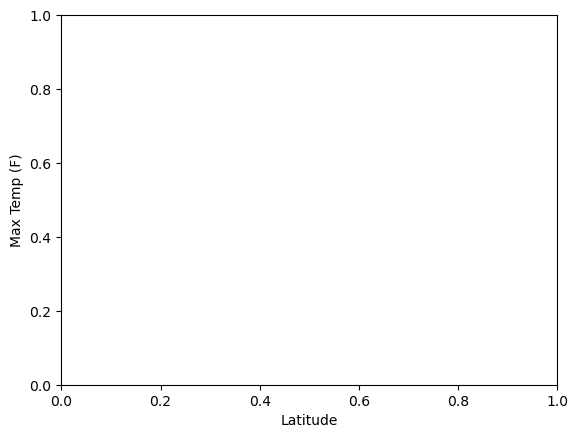

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Display sample data
northern_hemisphere.head()

equation = linregress(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

  
plt.show()

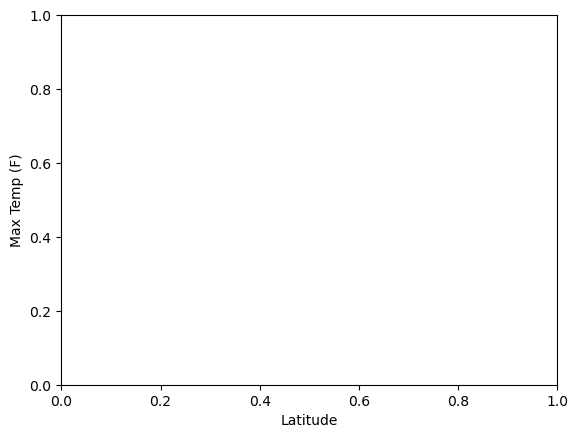

In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemisphere = city_data_df[city_data_df["Lat"] >= 0]

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Display sample data
southern_hemisphere.head()

plt.show()


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.39x + 32.59
The r-squared is: -0.7593092976532114
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


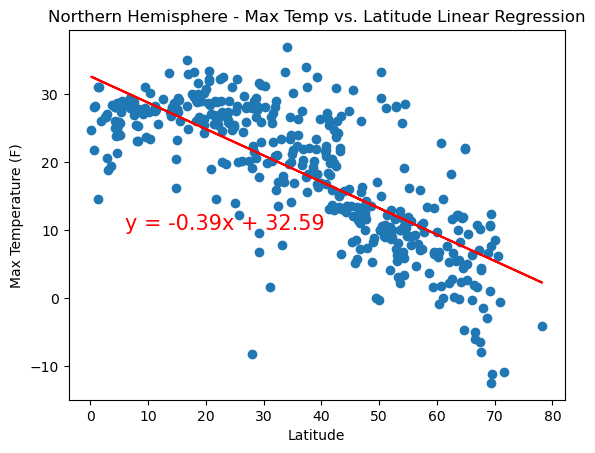

In [39]:
# Linear regression on Northern Hemisphere


x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()


Regression line equation is: y = -0.39x + 32.59
The r-squared is: -0.7593092976532114
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


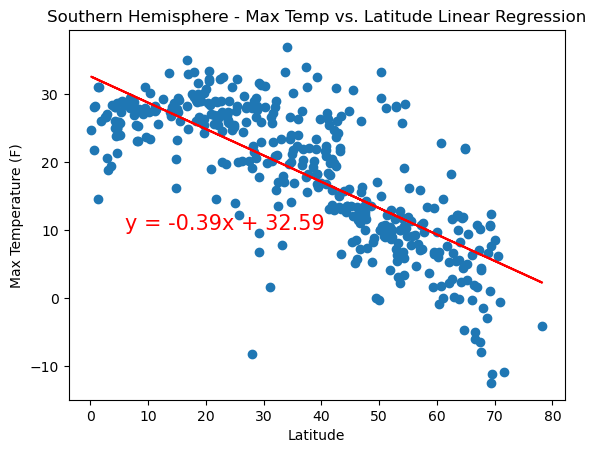

In [40]:
# Linear regression on Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = -0.0x + 67.87
The r-squared is: -0.00283252193542081
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


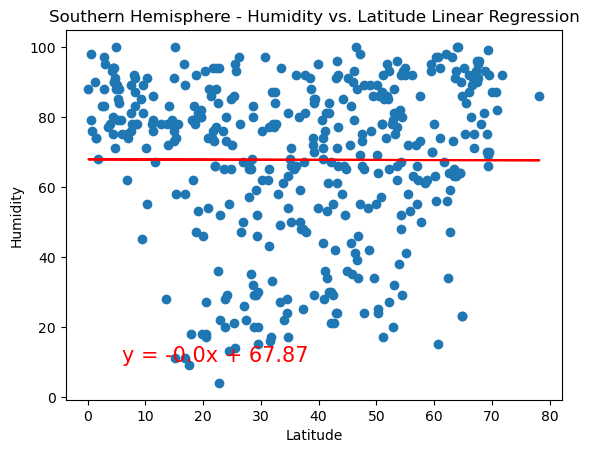

In [41]:
# Northern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()



Regression line equation is: y = -0.0x + 67.87
The r-squared is: -0.00283252193542081
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


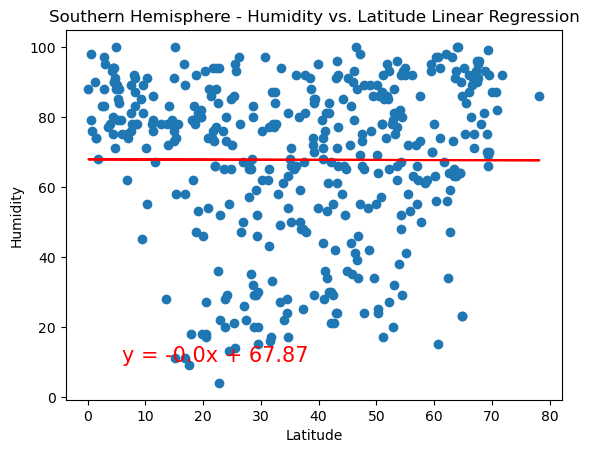

In [42]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.24x + 48.93
The r-squared is: 0.12489130558017486
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


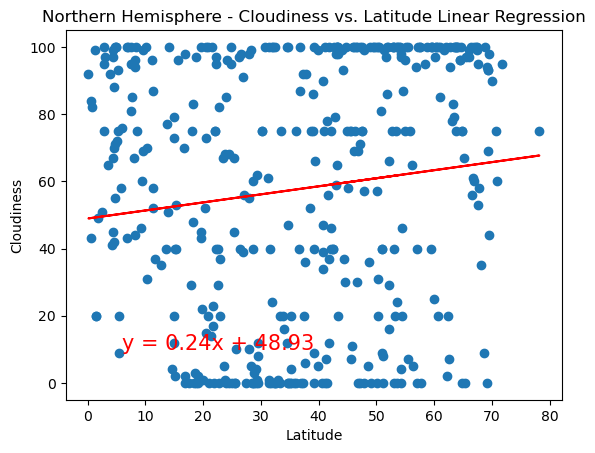

In [43]:
# Northern Hemisphere

x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.24x + 48.93
The r-squared is: 0.12489130558017486
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


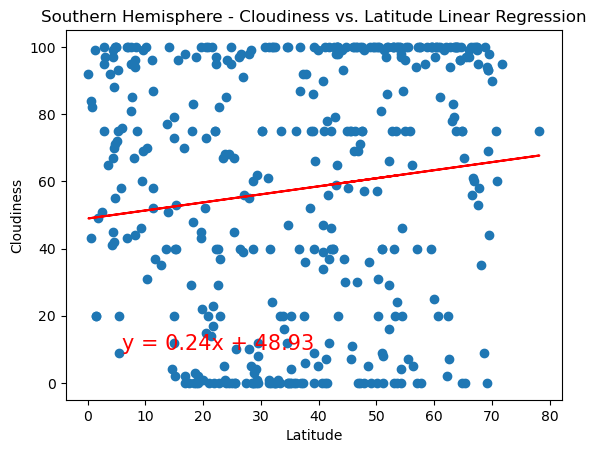

In [44]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.01x + 3.41
The r-squared is: 0.06332198874941114
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


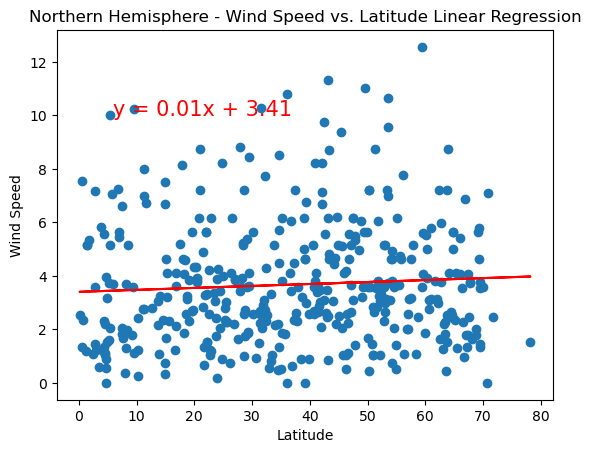

In [45]:
# Northern Hemisphere

x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

Regression line equation is: y = 0.01x + 3.41
The r-squared is: 0.06332198874941114
The regression displays a negative correlation.
In the southern hemisphere, as you move away from the equator the temperature decreases.


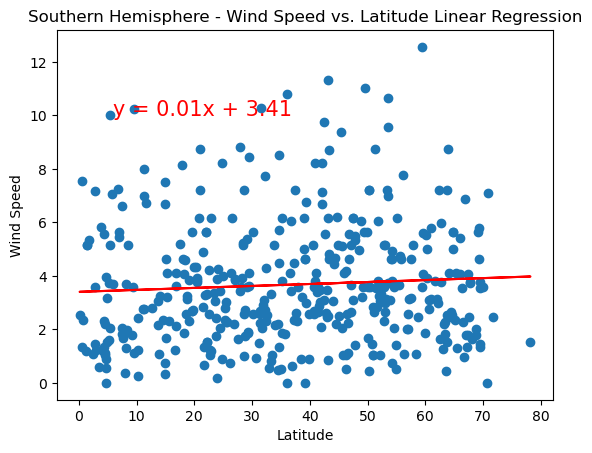

In [46]:
# Southern Hemisphere

x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the southern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE